In [ ]:
#data preprocessing till 4/12/25 should be collected not here or here no idea
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
# Load a dataset
iris = load_iris()

x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

print("Dataset Shape:", x.shape)
print("Class labels:", iris.target_names)

Dataset Shape: (150, 4)
Class labels: ['setosa' 'versicolor' 'virginica']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2)

In [ ]:
# Scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("\nNormalization Complete!")


Normalization Complete!


In [ ]:
#Normalization
normalizer = Normalizer()

x_train_norm = normalizer.fit_transform(x_train_scaled)
x_test_norm = normalizer.transform(x_test_scaled)

print("\nNormalization Complete!")


Normalization Complete!


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species_id"] = iris.target

In [ ]:
df['species_name'] = df['species_id'].map(
    {i: name for i, name in enumerate(iris.target_names)}
)

In [ ]:
#6/12/25 implement inheritance think so
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
#2 dataset loading
data = fetch_california_housing(as_frame=True)
df = data.frame

In [ ]:
#3
from sklearn.model_selection import train_test_split
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16512, 8) (4128, 8) (16512,) (4128,)


In [ ]:
#4
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = fetch_california_housing(as_frame=True).frame
X = df.drop("MedHouseVal", axis=1)
print(X.corr()); print([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


In [ ]:
#5
from sklearn.linear_model import LinearRegression; from sklearn.metrics import *
model = LinearRegression().fit(X_train, y_train); y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred))
print(list(model.coef_)); print(model.intercept_)


0.5558915986952444 0.5332001304956553 0.5757877060324508
[np.float64(0.44867490966571666), np.float64(0.009724257517904806), np.float64(-0.12332334282795815), np.float64(0.7831449067929722), np.float64(-2.029620580100075e-06), np.float64(-0.003526318487134238), np.float64(-0.4197924865883604), np.float64(-0.433708064963987)]
-37.02327770606409


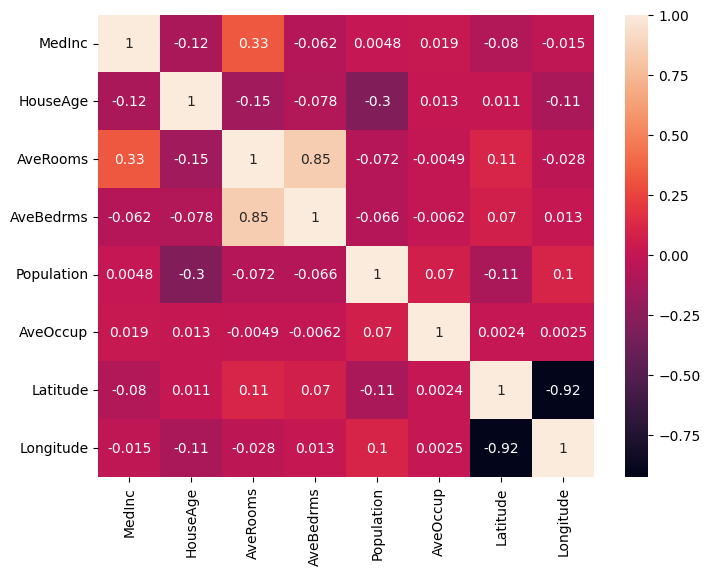

In [ ]:
#6import matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame; X = df.drop("MedHouseVal", axis=1)
plt.figure(figsize=(8,6)); sns.heatmap(X.corr(), annot=True); plt.show()


In [ ]:
#7 prediction
y_pred_lr=lr.predict(X_test)

Text(0, 0.5, '')

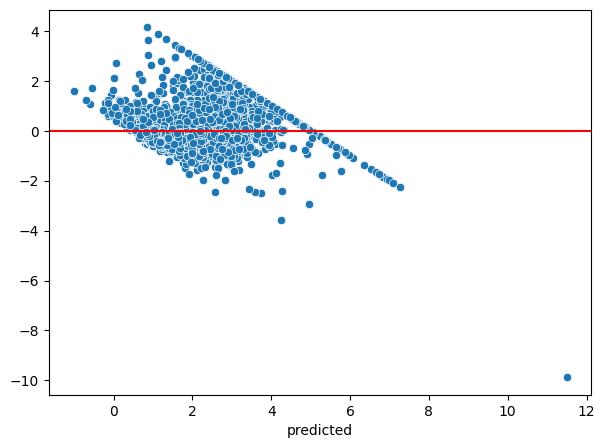

In [ ]:
#8 .visualizing regression residuals
residuals = y_test-y_pred_lr
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_lr,y=residuals)
plt.axhline(0,color='red')
plt.xlabel("predicted")
plt.ylabel("")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- AveBedrms
- AveOccup
- AveRooms
- HouseAge
- Latitude
- ...


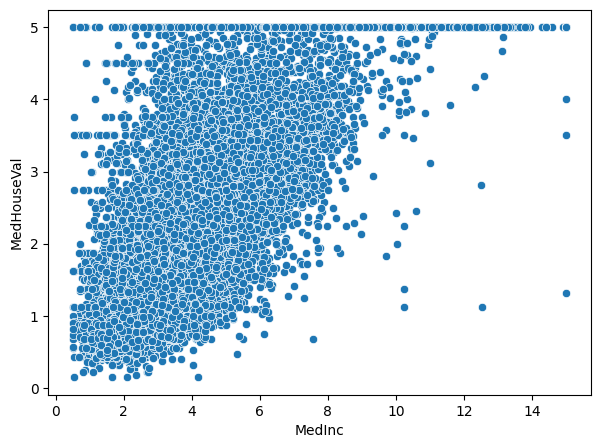

In [ ]:
#10 regression line for 1 feature
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"])
sns.lineplot(
    x=df["MedInc"],
    y=lr.predict(df[["MedInc"]]),
    color="red"
)
plt.title("Regression line for MedInc vs house value")
plt.show()



In [ ]:
#11 train decision tree regressor
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
#12 support vector regressor(SVR)
from sklearn.svm import SVR   # <-- FIXED

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)


In [ ]:
#13 evaluation
def evaluate(y_true,y_pred,x_test):
    mae= mean_absolute_error(y_true,y_pred)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    r2=r2_score(y_true,y_pred)
    adjusted_mutual_info_score
    /(len(y_true)-X_test.shape[1]-1)
    return ma,rmse,r2,adj_r2

In [ ]:
def evaluate(y_true, y_pred, x_test):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(y_true) - 1) / (len(y_true) - x_test.shape[1] - 1))
    return mae, rmse, r2, adj_r2
